In [8]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv(r"C:\Users\temisola\DMML-Dubai-UG-Group-2\Datasets\processed\tabular_data\brain_tumor_dataset.csv")

In [10]:
print(df['Histology'].value_counts())

Histology
Glioblastoma       5068
Meningioma         5016
Medulloblastoma    4979
Astrocytoma        4937
Name: count, dtype: int64


In [11]:
#defining input and target classes
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns = ['Patient_ID', 'Histology'])
#input features
y = df['Histology']
# target variable

#Encode Y to convert to numbers for easier classification
le = LabelEncoder()
y = le.fit_transform(y)

#converts each categorical column into multiple binary columns
X = pd.get_dummies(X, drop_first=True)

In [13]:
print(pd.Series(y).unique())
print(le.classes_)


[0 1 3 2]
['Astrocytoma' 'Glioblastoma' 'Medulloblastoma' 'Meningioma']


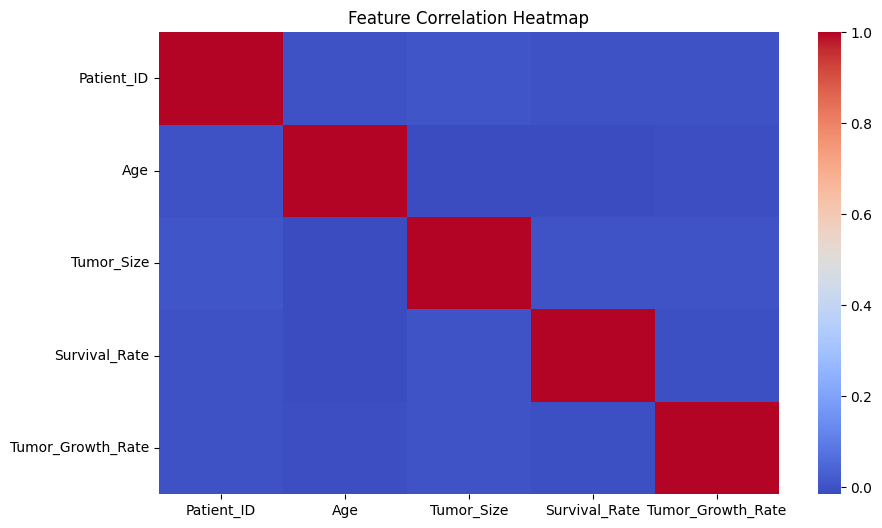

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split  #randomly splits data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    #test size of 20%
    random_state=42,  
    stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

#checking the distribution of classes in training and test sets

Training set size: (16000, 27)
Test set size: (4000, 27)


In [18]:
# Initialize
lr = LogisticRegression(max_iter=1000, random_state=42)

# Train
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [19]:
# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
train_acc_lr = lr.score(X_train, y_train)
test_acc_lr  = lr.score(X_test, y_test)

print(f"Training Accuracy: {train_acc_lr:.4f}")
print(f"Testing Accuracy:  {test_acc_lr:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, target_names=le.classes_))


Training Accuracy: 0.2707
Testing Accuracy:  0.2460

Classification Report:
                  precision    recall  f1-score   support

    Astrocytoma       0.23      0.25      0.24       987
   Glioblastoma       0.26      0.33      0.29      1014
Medulloblastoma       0.23      0.20      0.22       996
     Meningioma       0.26      0.20      0.23      1003

       accuracy                           0.25      4000
      macro avg       0.25      0.25      0.24      4000
   weighted avg       0.25      0.25      0.24      4000



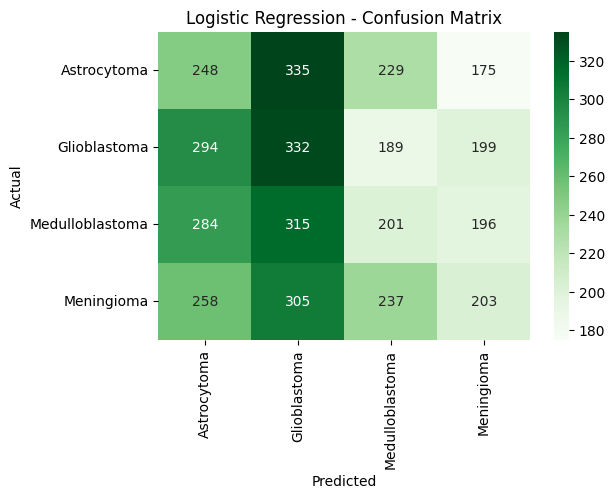

In [20]:
#visualizing confusion matrix

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()